### Data Info
- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- Blood Pressure : 혈압(mm Hg)
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린(mu U/ml)
- BMI : 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값(0 또는 1)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv('diabetes.csv')
print(df['Outcome'].value_counts())
df.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 전체 768개 데이터 중에 Negative 값 0이 500개 Positive 값 1이 268개로 Negative가 상대적으로 많다.
\

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- null 값은 없고 피처의 타입은 모두 숫자형이다.
- 로지스틱 회귀를 이용해 예측 모델 생성을 해본다.

In [99]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print("정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 :{:.4f}".format(accuracy, precision, recall,f1))
    

In [101]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값. 칼럼 위치 -1을 이용해 추출한다
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)
# 로지스틱 회귀로 학습, 예측 및 평가 수행.

오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 :0.6465


/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 예측 정확도가 77.27%, 재현율은 59.26%
- 전체 데이터의 65% 가 Negative이므로 정확도보다는 재현율 성능에 좀 더 초점을 맞춰본다.
- 이를 위해 precision_recall_curve_plot() 함수를 이용


In [103]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X 축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x 축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()



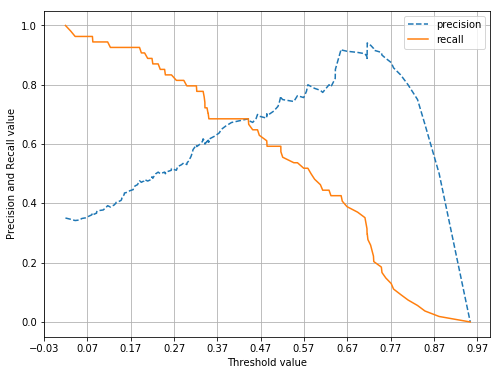

In [104]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)



- 재현율 곡선을 보면 임계값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞춘다.
- 하지만 두 개의 지표 모두 0.7이 안되는 수치이다. 이것은 여전히 낮다. 임계값을 수정하기 전에 데이터 값을 점검해본다.

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min 값이 0인 데이터가 많다.
- Glucose 는 포도당 수치인데 0값이 존재하는건 말이 안된다.
- 히스토그램을 통해 확인한다.


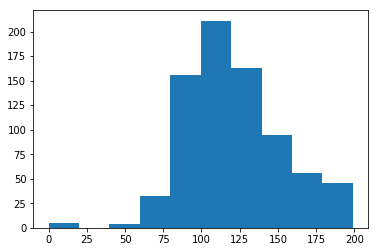

In [108]:
plt.hist(df['Glucose'], bins=10)
plt.show()

- min 값이 0으로 돼 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트 비율로 존재하는지 확인


In [115]:
# 0 값을 검사할 피처 명 리스트
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = df.count()[0]

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출 후 퍼센트 계산
for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print("{}의 0 건수는 {}, 퍼센트는 {:.2f}%".format(feature, zero_count, 100*zero_count/total_count))

Glucose의 0 건수는 5, 퍼센트는 0.65%
BloodPressure의 0 건수는 35, 퍼센트는 4.56%
SkinThickness의 0 건수는 227, 퍼센트는 29.56%
Insulin의 0 건수는 374, 퍼센트는 48.70%
BMI의 0 건수는 11, 퍼센트는 1.43%


- SkinThickness 와 Insulin 의 0 값이 많다.
- 전체 데이터 건수가 적기 때문에 일괄적으로 삭제하는건 비효율적이다.
- 위 피처의 0 값을 평균값으로 대체하기로 한다.


In [116]:
# zero_features 리스트에 저장된 개별 피쳐들에 대해 0값을 평균 값으로 대체
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

In [121]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# StandardScaler 클래스로 피처 데이터 세트에 일괄적으로 스케일링을 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측, 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 :0.6804


/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
